# PRCP-1013-WalkRunClass	

Walking Running Classification	

This dataset contains accelerometer and gyroscope data associated when a person is running and walking. The target is to create a ANN model to predict the state of body from input of sensor.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
data = pd.read_csv('E:\data_science\walkrun.csv')
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,30-06-2017,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,30-06-2017,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,30-06-2017,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,30-06-2017,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,30-06-2017,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [3]:
data.shape

(88588, 11)

In [4]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [5]:
data.describe()


,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [6]:
datacorr = data.corr()
datacorr

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
wrist,1.000000,-0.113404,-0.609579,0.087091,0.323680,-0.022092,-0.068403,0.008796
activity,-0.113404,1.000000,-0.017747,0.639520,-0.192435,0.040856,0.012055,-0.008106
acceleration_x,-0.609579,-0.017747,1.000000,-0.265169,-0.552374,-0.021705,-0.004091,-0.060849
acceleration_y,0.087091,0.639520,-0.265169,1.000000,0.106220,0.010549,0.072170,-0.022994
acceleration_z,0.323680,-0.192435,-0.552374,0.106220,1.000000,0.035296,-0.021004,0.049621
gyro_x,-0.022092,0.040856,-0.021705,0.010549,0.035296,1.000000,0.094011,0.317769
gyro_y,-0.068403,0.012055,-0.004091,0.072170,-0.021004,0.094011,1.000000,0.287244
gyro_z,0.008796,-0.008106,-0.060849,-0.022994,0.049621,0.317769,0.287244,1.000000


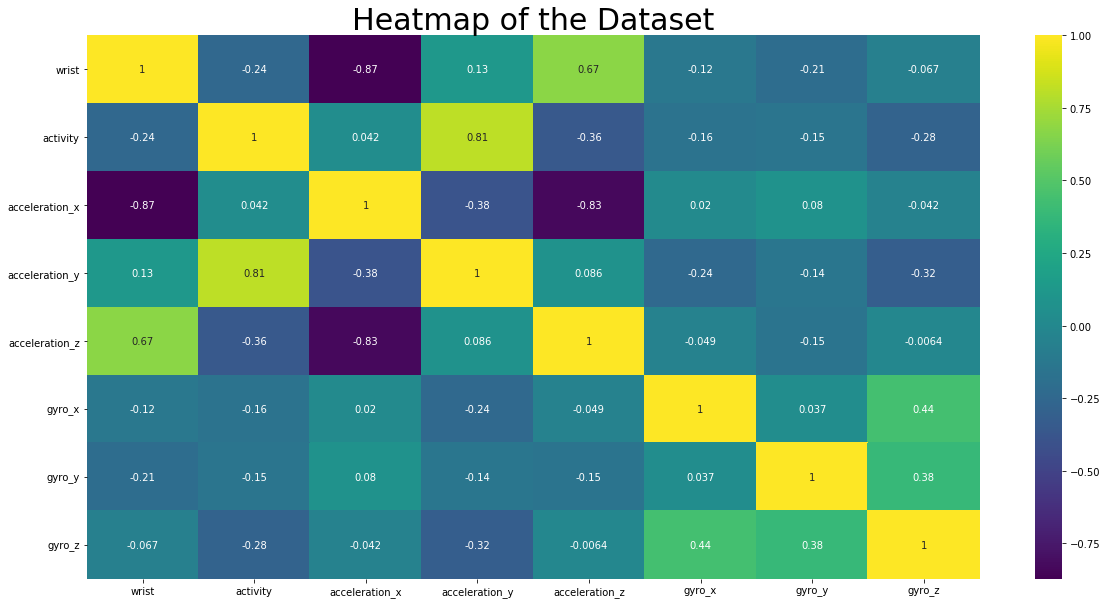

In [7]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(datacorr.corr(), annot = True, cmap = 'viridis')
plt.title('Heatmap of the Dataset', fontsize = 30)
plt.show()

In [8]:
import shutil

In [9]:
print('The dataset contains ' + str(data.shape[0]) + ' data samples and ' + str(data.shape[1]) + ' data columns')

The dataset contains 88588 data samples and 11 data columns


In [10]:
print('Dataset contains ' + str(pd.value_counts(data['activity'].values)[0]) + ' "walk" data samples as well as ' + str(pd.value_counts(data['activity'].values)[1]) + ' "run" data samples')

Dataset contains 44223 "walk" data samples as well as 44365 "run" data samples


In [11]:
print('The dataset contains ' + str(pd.value_counts(data['wrist'].values)[0]) + ' data samples collected on the left wrist as well as ' + str(pd.value_counts(data['wrist'].values)[1]) + ' data samples collected on the right wrist')

The dataset contains 42330 data samples collected on the left wrist as well as 46258 data samples collected on the right wrist


In [12]:
Left_wrist = 0
Right_wrist = 1

In [13]:
#walk data
data_walk_data = pd.DataFrame()
data_walk_data = data[(data.activity == 0)]

#run data
data_run_data = pd.DataFrame()
data_run_data = data[(data.activity == 1)]

In [14]:
walk_data_left_wrist_count = pd.value_counts(data_walk_data['wrist'].values, sort=False)[Left_wrist]
walk_data_right_wrist_count = pd.value_counts(data_walk_data['wrist'].values, sort=False)[Right_wrist]

run_data_left_wrist_count = pd.value_counts(data_run_data['wrist'].values, sort=False)[Left_wrist]
run_data_right_wrist_count = pd.value_counts(data_run_data['wrist'].values, sort=False)[Right_wrist]

In [15]:
print('Total number of "walk" data samples: ' + str(len(data_walk_data)))
print('    Number of left wrist samples: ' + str(walk_data_left_wrist_count))
print('    Number of right wrist samples: ' + str(walk_data_right_wrist_count))


Total number of "walk" data samples: 44223
    Number of left wrist samples: 18622
    Number of right wrist samples: 25601


In [16]:
print('Total number of "run" data samples: ' + str(len(data_run_data)))
print('    Number of left wrist samples: ' + str(run_data_left_wrist_count))
print('    Number of right wrist samples: ' + str(run_data_right_wrist_count))

Total number of "run" data samples: 44365
    Number of left wrist samples: 23708
    Number of right wrist samples: 20657


In [17]:
SENSOR = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [18]:
o  = data.loc[0:0, 'acceleration_x':'acceleration_z']
print(o)

   acceleration_x  acceleration_y  acceleration_z
0           0.265         -0.7814         -0.0076


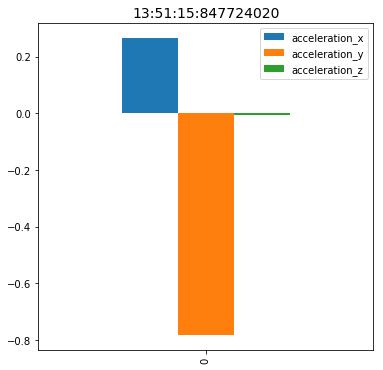

In [19]:
o.plot(kind='bar',figsize=(6,6))
plt.title('13:51:15:847724020',size=14)
plt.show()

In [20]:
z  = data.loc[4:4, 'gyro_x':'gyro_z']
print(z)

   gyro_x  gyro_y  gyro_z
4  0.0527  0.4379  2.4922


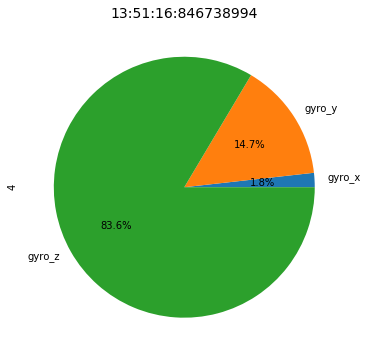

In [21]:
plt.figure(figsize=(6,6))
plt.title('13:51:16:846738994',size=14)
row = z.iloc[0]
row.plot(kind='pie',autopct='%1.1f%%')
plt.show()

# 3D graph of gyroscope data

In [22]:
X = data.loc[0:10, 'gyro_x']
print(X)

Y  = data.loc[0:10, 'gyro_y']
print(Y)

Z  = data.loc[0:10,['gyro_z']]
print(Z)

0    -0.0590
1    -0.1757
2    -0.9105
3     0.1199
4     0.0527
5     0.6925
6     0.0548
7    -0.8094
8    -0.4173
9     0.0388
10    0.2326
Name: gyro_x, dtype: float64
0     0.0325
1     0.0208
2     0.1063
3    -0.4099
4     0.4379
5    -0.2179
6    -0.1896
7    -0.7938
8    -0.1904
9     1.1491
10    0.4321
Name: gyro_y, dtype: float64
    gyro_z
0  -2.9296
1   0.1269
2  -2.4367
3  -2.9336
4   2.4922
5   2.5750
6   0.4473
7  -1.4348
8  -2.6759
9   1.6982
10  2.1009


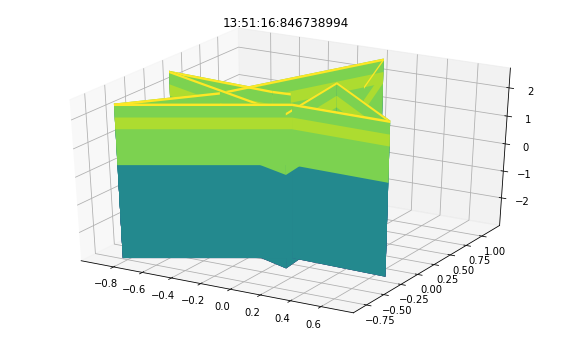

In [23]:
from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure(1, figsize = (10, 6))
plot3d = plt.axes(projection='3d')
plot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', linewidth=0.1)
plt.title('13:51:16:846738994')
plt.show()


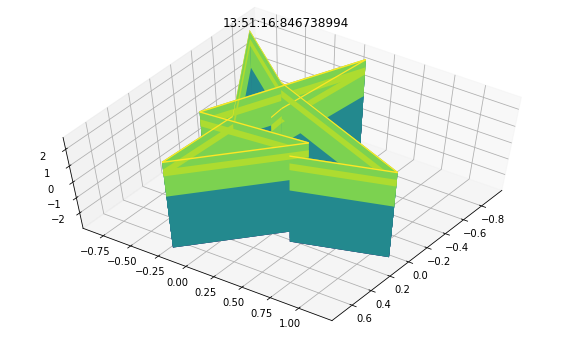

In [24]:
plot3d.view_init(60, 35)
figure

In [25]:
c = data.loc[58996:58996, 'acceleration_x':'gyro_z']
print(c)#58996

       acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z
58996         -0.0671         -0.3419          0.1591  0.5022  0.0633  0.8145


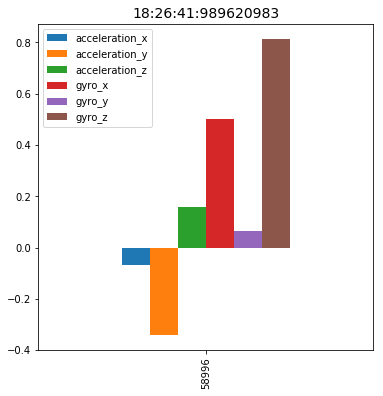

In [26]:
c.plot(kind='bar',figsize=(6,6))
plt.title('18:26:41:989620983',size=14)
plt.show()

In [27]:
q = data.loc[:,['time','wrist']]
print(q)

                     time  wrist
0      13:51:15:847724020      0
1      13:51:16:246945023      0
2      13:51:16:446233987      0
3      13:51:16:646117985      0
4      13:51:16:846738994      0
...                   ...    ...
88583   20:9:15:317911028      0
88584   20:9:15:517889022      0
88585   20:9:15:717828989      0
88586   20:9:15:917932987      0
88587   20:9:16:117410004      0

[88588 rows x 2 columns]


Text(0.5, 1.0, 'time ')

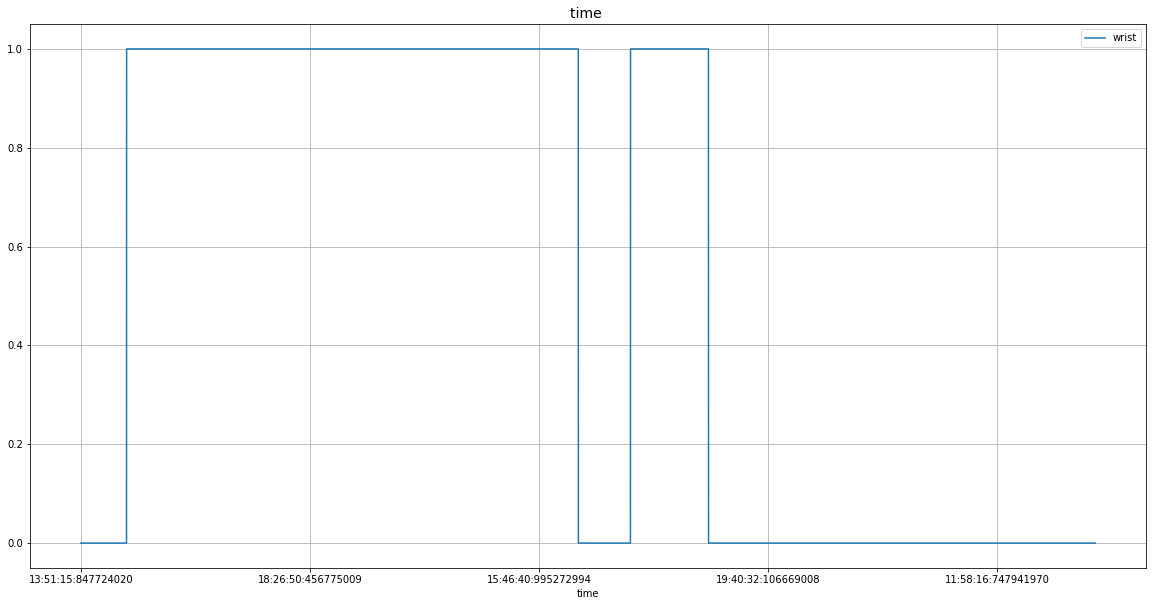

In [28]:
q.plot(x='time', y='wrist' ,figsize=(20,10), grid=True)
plt.title('time ',size=14)

In [29]:
q1 = data.loc[:,['time','activity']]
print(q1)

                     time  activity
0      13:51:15:847724020         0
1      13:51:16:246945023         0
2      13:51:16:446233987         0
3      13:51:16:646117985         0
4      13:51:16:846738994         0
...                   ...       ...
88583   20:9:15:317911028         0
88584   20:9:15:517889022         0
88585   20:9:15:717828989         0
88586   20:9:15:917932987         0
88587   20:9:16:117410004         0

[88588 rows x 2 columns]


Text(0.5, 1.0, 'time ')

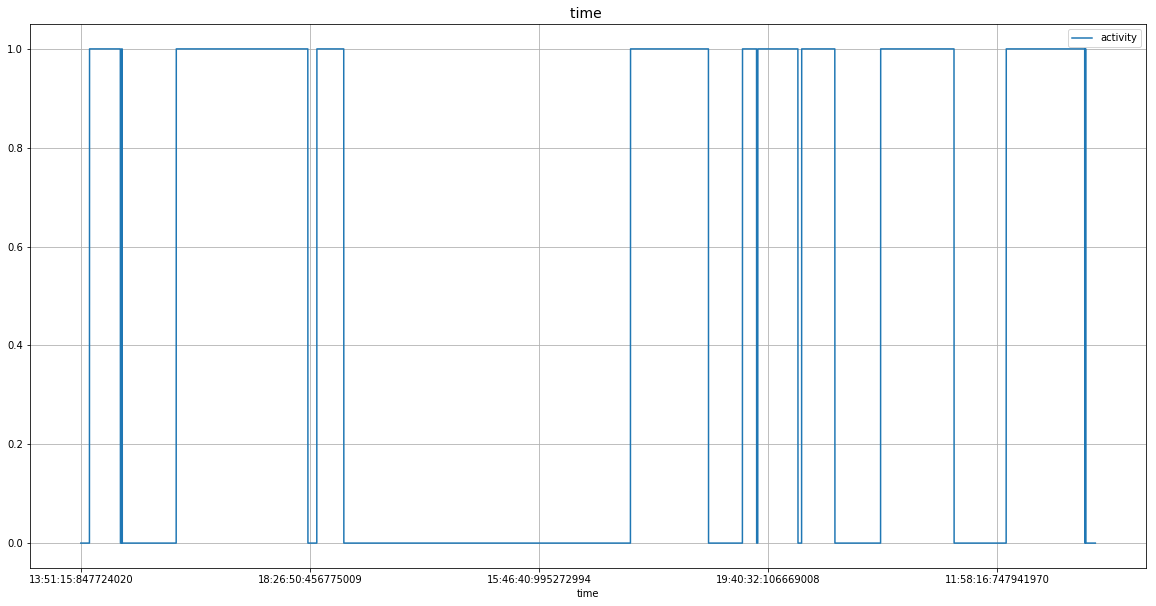

In [30]:
q1.plot(x='time', y='activity' ,figsize=(20,10), grid=True)
plt.title('time ',size=14)

In [31]:
q2 = data.loc[:,['date','activity']]
print(q2)

             date  activity
0      30-06-2017         0
1      30-06-2017         0
2      30-06-2017         0
3      30-06-2017         0
4      30-06-2017         0
...           ...       ...
88583  09-07-2017         0
88584  09-07-2017         0
88585  09-07-2017         0
88586  09-07-2017         0
88587  09-07-2017         0

[88588 rows x 2 columns]


Text(0.5, 1.0, 'date ')

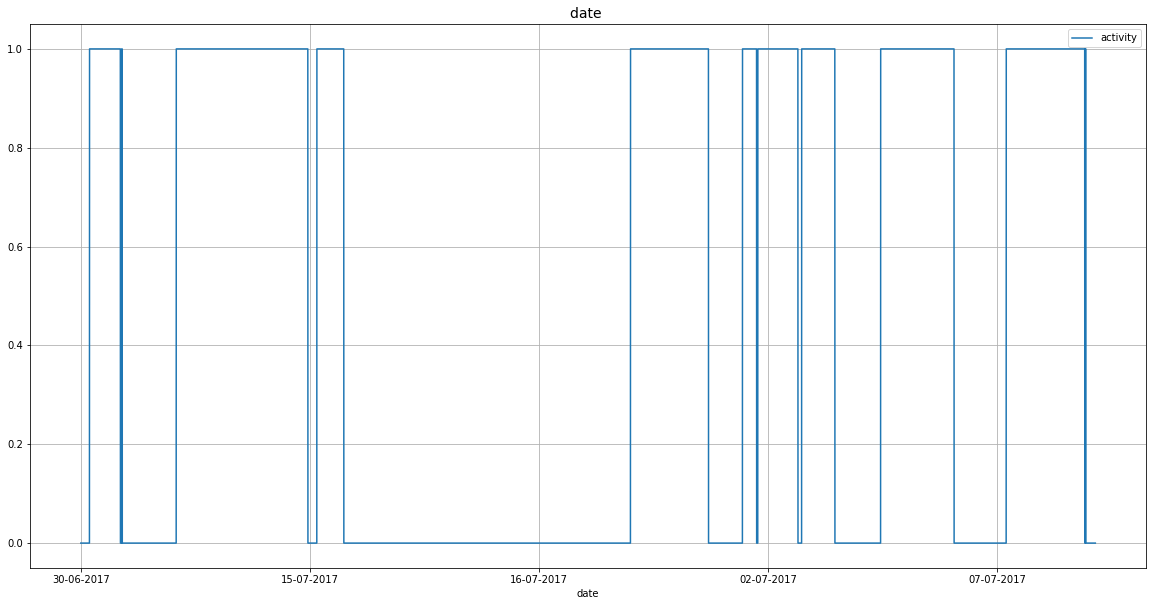

In [32]:
q2.plot(x='date', y='activity' ,figsize=(20,10), grid=True)
plt.title('date ',size=14)

In [33]:
q3 = data.loc[:,['date','wrist']]
print(q3)

             date  wrist
0      30-06-2017      0
1      30-06-2017      0
2      30-06-2017      0
3      30-06-2017      0
4      30-06-2017      0
...           ...    ...
88583  09-07-2017      0
88584  09-07-2017      0
88585  09-07-2017      0
88586  09-07-2017      0
88587  09-07-2017      0

[88588 rows x 2 columns]


Text(0.5, 1.0, 'date ')

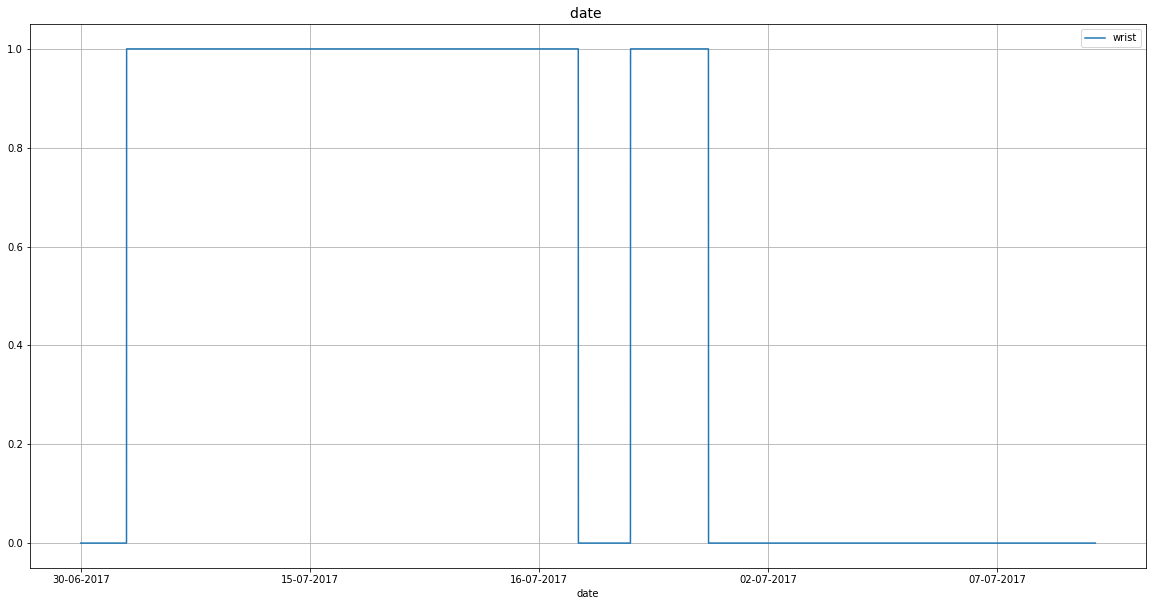

In [34]:
q3.plot(x='date', y='wrist' ,figsize=(20,10), grid=True)
plt.title('date ',size=14)

# logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score

In [36]:
X1=data.loc[:,'acceleration_x':'gyro_z']
y1=data.wrist

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=17)

In [38]:
X_train.shape

(62011, 6)

In [39]:
X_test.shape

(26577, 6)

In [40]:
model = LogisticRegression()

In [41]:
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.900101591601761

In [42]:
y_test

48692    1
33909    1
18772    1
36447    1
78624    0
        ..
58123    0
45657    0
75164    0
21239    1
36294    1
Name: wrist, Length: 26577, dtype: int64

In [43]:
y_predict

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [44]:
confusion_matrix(y_test,y_predict)

array([[11381,  1249],
       [ 1406, 12541]], dtype=int64)

In [45]:
pd.crosstab(y_test,y_predict)

col_0,0,1
wrist,,
0,11381,1249
1,1406,12541


# RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

In [47]:
Counter(data.wrist)

Counter({0: 42330, 1: 46258})

In [48]:
X_train ,X_test,y_train,y_test = train_test_split(X1,y1,random_state=7)
model=RandomForestClassifier(n_estimators=22,random_state=7)
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9850544091750576

In [49]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({1: 11573, 0: 10574})


col_0,0,1
wrist,,
0,10404,170
1,161,11412


In [50]:
model.score(X_train,y_train)

0.9998795924203429

In [51]:
model.score(X_test,y_test)

0.9850544091750576

# xgboost

In [52]:
from xgboost import XGBClassifier

In [53]:
X_train ,X_test,y_train,y_test = train_test_split(X1,y1,random_state=17)

In [54]:
model=XGBClassifier(learning_rate=0.7,n_estimators=250,random_state=10)
model.fit(X_train,y_train) 
y_predict= model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9841061994852576

In [55]:
pd.crosstab(y_test,y_predict)

col_0,0,1
wrist,,
0,10318,175
1,177,11477


# ANN MODEL

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold,cross_val_score,train_test_split

Using TensorFlow backend.


In [57]:
def create_model():
    # Define model
    global model
    model = Sequential()
    model.add(Dense(12, input_dim=6, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [58]:
from keras.utils.np_utils import to_categorical

estimator = KerasClassifier(create_model, epochs=200, batch_size=100, verbose=False)
y_test = to_categorical(y_test)

results = estimator.fit(X_train.values, y_train.values,validation_data=(X_test,y_test))
#X_train2.as_matrix()

In [59]:
kfold = KFold(n_splits=2, shuffle=True, random_state=5)
cv_results = cross_val_score(estimator, X_test, y_test, cv=kfold)

In [60]:
cv_results

array([0.9823912 , 0.98067372])

In [61]:
print("data results (Avg.accuracy) : ",(cv_results.mean()*100))

data results (Avg.accuracy) :  98.15324598834859


In [62]:
estimator.predict(X_test)

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [63]:
var = np.array(X_test.iloc[10])
var

array([ 0.3595, -0.8194, -0.413 ,  1.0581,  0.4305,  0.855 ])

In [64]:
estimator.predict([[var]])

array([0], dtype=int64)

In [68]:
y_test[10]

array([1., 0.], dtype=float32)